**Reading in the training data**

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the data using pandas
df = pd.read_csv('https://raw.githubusercontent.com/ramdeveloper1985/datascience/master/diabetes.csv')
#check data has been read in properly
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [0]:
#check number of rows and columns in dataset
print("Diabetes data set dimensions : {}".format(df.shape))


Diabetes data set dimensions : (768, 9)


‘Outcome’ is the column which we are going to predict , which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non diabetic) and 268 as 1 (diabetic)

In [0]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [0]:
import seaborn as sns
sns.countplot(df['Outcome'],label="Count")

In [0]:
df.groupby("Outcome").hist(figsize=(10, 10))

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

**Missing or Null Data points**
In this DS, no null or missing values

In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Unexpected Outliers**

**Blood pressure **: By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seems wrong because a living person cannot have diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.

In [0]:
print("Total Rows having BloodPressure value as zero: ", df[df.BloodPressure == 0].shape[0])


Total Rows having BloodPressure value as zero:  35


In [0]:
print(df[df.BloodPressure == 0].groupby('Outcome').count()) # This will apply group by of 'outcome' to all columns when the bloodpressure is zero
print('----------------------------------------------------')
print(df[df.BloodPressure == 0].groupby('Outcome')['BloodPressure'].count())
print('----------------------------------------------------')
print(df[df.BloodPressure == 0].groupby('Outcome').count()[['BloodPressure']])

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                 19       19             19             19       19   19   
1                 16       16             16             16       16   16   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                              19   19  
1                              16   16  
----------------------------------------------------
Outcome
0    19
1    16
Name: BloodPressure, dtype: int64
----------------------------------------------------
         BloodPressure
Outcome               
0                   19
1                   16


**Plasma glucose levels **: Even after fasting glucose level would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.

In [0]:
print("Total Rows having Glucose value as zero: ", df[df.Glucose == 0].shape[0])
print(df[df.Glucose == 0].groupby('Outcome').count()[['Glucose']])

Total Rows having Glucose value as zero:  5
         Glucose
Outcome         
0              3
1              2


**Skin Fold Thickness **: For normal people skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0 : 227

In [0]:
print("Total Rows having SkinThickness value as zero: ", df[df.SkinThickness == 0].shape[0])
print(df[df.SkinThickness == 0].groupby('Outcome').count()[['SkinThickness']])

Total Rows having SkinThickness value as zero:  227
         SkinThickness
Outcome               
0                  139
1                   88


**BMI** : Should not be 0 or close to zero unless the person is really underweight which could be life threatening

In [0]:
print("Total Rows having BMI value as zero: ", df[df.BMI == 0].shape[0])
print(df[df.BMI == 0].groupby('Outcome').count()[['BMI']])

Total Rows having BMI value as zero:  11
         BMI
Outcome     
0          9
1          2


**Insulin** : In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts

In [0]:
print("Total Rows having Insulin value as zero: ", df[df.Insulin == 0].shape[0])
print(df[df.Insulin == 0].groupby('Outcome').count()[['Insulin']])

Total Rows having Insulin value as zero:  374
         Insulin
Outcome         
0            236
1            138


**several ways to handle invalid data values :**

*Ignore/remove these cases *: This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns means have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.


*Put average/mean values : *This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.


*Avoid using features :* It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but its hard to predict that.

Remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [3]:
df_updated = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_updated.shape)

(724, 9)


**Feature Engineering**

Feature engineering is the process of transforming the gathered data into features that better represent the problem that we are trying to solve to the model, to improve its performance and accuracy.

Feature engineering create more input features from the existing features and also combine several features to produce more intuitive features to feed to the model.

“ Feature engineering enables to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows to avoid overfitting the model despite providing many input features”

**Split up the dataset into inputs and targets**

In [4]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [5]:
#separate target values
y = df['Outcome']
#view target values
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Evaluation Methods**

It is a general practice to avoid training and testing on the same data. The reasons are that, the goal of the model is to predict out-of-sample data, and the model could be overly complex leading to overfitting. To avoid the aforementioned problems, there are two precautions.

Train/Test Split

K-Fold Cross Validation

Import “train_test_split” for train/test split and “cross_val_score” for k-fold cross validation. 

“accuracy_score” is to evaluate the accuracy of the model in the train/test split method.

*from sklearn.model_selection import train_test_split*

*from sklearn.model_selection import cross_val_score*

*from sklearn.metrics import accuracy_score*

**Split the dataset into train and test data**

In [0]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results
# Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. 
# For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, 
# setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes

**Building and training the model**

Ex: Generally training the model with Scikit learn is as follows.

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Testing the model

In [0]:
# Testing the model
# show first 5 model predictions on the test data
# 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes
knn.predict(X_test)[0:5]


array([0, 0, 0, 0, 1])

In [0]:
# how our accurate our model is on the full test set
# To do this, we will use the ‘score’ function
# pass in our test input and target data to see how well our model predictions match up to the actual results
# check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

In [0]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6688311688311688


**k-Fold Cross-Validation**

The train-test-split method is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data

Pros : More accurate estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing)
Cons : Much slower than Train/Test split.

**Steps for cross-validation:**

Dataset is split into K "folds" of equal size

Each fold acts as the testing set 1 time, and acts as the training set K-1 times

Average testing performance is used as the estimate of out-of-sample performance.Also known as cross-validated performance

**Benefits of cross-validation:**

More reliable estimate of out-of-sample performance than train/test split. Reduce the variance of a single trial of a train/test split

**Can be used for**
Selecting tuning parameters

Choosing between models

Selecting features

**Drawbacks of cross-validation:**

Can be *computationally expensive* Especially when the data set is very large or the model is slow to train

In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable

To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


**Hypertuning model parameters using GridSearchCV**

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results

Create a dictionary, set ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’

In [0]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

check which of our values for ‘n_neighbors’ that we tested performed the best. To do this, we will call ‘best_params_’ on our model.

In [0]:
#save best model
knn_best = knn_gscv.best_estimator_

In [0]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation

In [0]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578125

By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%

**Random Forest**

A random forest is considered an ensemble model in itself, since it is a collection of decision trees combined to make a more accurate model

‘n_estimators’ is the number of trees in our random forest. Then we can run our grid search to find the optimal number of trees

In [0]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
#save best model
rf_best = rf_gs.best_estimator_


In [0]:
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


**Logistic Regression**

Logistic regression is a classification method
In our case, we do not tune any hyperparameters

In [0]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

knn: 0.7922077922077922
rf: 0.7597402597402597
log_reg: 0.7662337662337663


**Voting Classifier**

Place our three models in an array called ‘estimators’. 

Next, create voting classifier. It takes two inputs. The first is our estimator array of our three models. The second is the voting parameter , which is set to hard, which tells our classifier to make predicitons by majority vote

Fit our ensemble model to our training data and score it on our testing data

Our ensemble model performed better than our individual k-NN, random forest and logistic regression models

In [0]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [0]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7662337662337663

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [0]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.701299
1  SVC  0.649351
2   LR  0.766234
3   DT  0.740260
4  GNB  0.707792
5   RF  0.701299
6   GB  0.753247


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

  Name     Score
0  KNN  0.726555
1  SVC  0.651025
2   LR  0.769515
3   DT  0.683459
4  GNB  0.755178
5   RF  0.739542
6   GB  0.765602


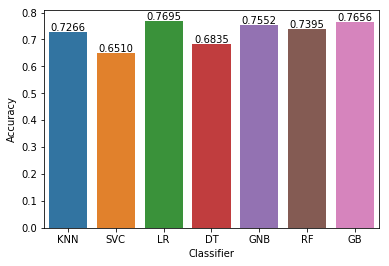

In [0]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

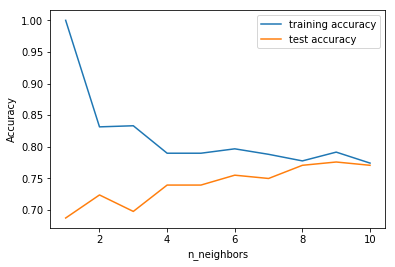

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors

In [0]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [0]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [0]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [0]:
plot_feature_importances_diabetes(rf)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


In [0]:
plot_feature_importances_diabetes(gb)

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale:

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data made a huge difference! Now we are actually underfitting, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model

In [0]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set: 0.797


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


increasing C allows us to improve the model, resulting in 79.7% test set accuracy

**Deep Learning**

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. **deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1**. We must re-scale our data so that it fulfills these requirements.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Accuracy on training set: 0.823
Accuracy on test set: 0.802


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Increasing the number of iterations only increased the training set performance, not the test set performance

Let’s increase the alpha parameter and add stronger regularization of the weights:

In [0]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797


we plot a heat map of the first layer weights in a neural network learned on the diabetes data set

In [0]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), df)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

** Feature Engineering **

Not all the features need to be winners. Most of the time, there are features that don’t improve the model. Such cases can be found by further analysis of the features related to the model.

**Univariate Feature Selection **: Statistical tests can be used to select those features that have the strongest relationship with the output variable.

**Recursive Feature Elimination** : The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

**Principal Component Analysis **: Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

**Feature Importance :** Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

**Using Recursive Feature Elimination as the feature selection method.**

Import RFECV, which comes with inbuilt cross validation feature.

Same as the classifier model, RFECV has the fit() method which accepts features and the response/target